# Tutorial for BayBooNE: Baysian Booster Neutrino Experiment python package


This package is designed to use Bayesian parameter estimation to find sterile neutrino oscillation parameters ($\Delta m_{14}^2, sin^2 2\theta_{14}$) from a data sample containing initial muon neutrino flux and number of electron neutrinos detected at a particular neutrino energy.

To do so, we first simulate a short-baseline neutrino oscillation dataset for a particular ($\Delta m^2, sin^2 2\theta$) pair, and then use a pymc3-based algorithm to infer the parameters from our simulated data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bayboone.data_io import generative_model
from bayboone.inference import module as ifunc

## Create a sample dataset by simulating data based on our generative model.

The generative model draws from known values of neutrino energy E, distance from detector L, to calculate numu to nue oscillation probability, and then adjusts for overall flux (in progress). 

Importantly, we use $$ P_{\nu_{\mu} -> \nu_{e-}} = sin^2(2\theta_{14})sin^2(1.27\frac{\Delta m^2 L}{E})$$

In [2]:
# To simulate a sample using the default values (n_points=100, stheta=0.5, dm=10e-5)
# data = generative_model()

# To simulate a sample with particular values
data = generative_model(10000, 0.03, 10e-4)
# These values were chosen to illustrate the shape of the model, rather than to be realistic

Plot N_nue as a function of L/E - this will be entirely determined by our oscillation parameters and our systematic uncertainties (modeling of systematic uncertainties coming soon!)

Text(0, 0.5, 'Probability of numu -> nue')

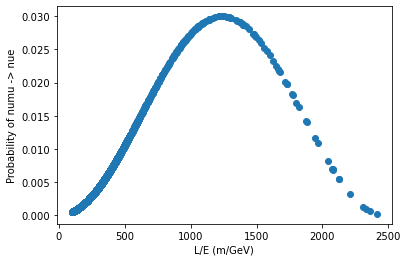

In [3]:
L_over_E = data['L'].values/data['E'].values
plt.scatter(L_over_E, data['N_nue'], )
plt.xlabel('L/E (m/GeV)')
plt.ylabel('Probability of numu -> nue')

## Infer $\Delta m^2$ and $sin^2 2\theta$ from the data created by our model.

We make use of three functions from our inference_functions pacakge (imported here as ifunc):

-  oscillation_model: sets up our model in pymc3
-  fit_model: fits data to a statistical model of our data prediction
-  print_fit_vals: returns the fit values and uncertainties on our parameters

In [4]:
ifunc.oscillation_model(data)
# nue_Flux should be drawn from a Beta distribution, but we're dealing with a problem in pymc3 
# which prevents the code from running succesfully do to pymc3 choosing guess values excluded by the priors. 

In [5]:
best_fit, cov = ifunc.fit_model(data, initial_guess = {'sin^2_2theta':0.9, 'delta_m^2':.10})

In [6]:
ifunc.print_fit_vals(best_fit, cov)

,value,uncertainty
sin^2_2theta,-0.801534,2.844748
delta_m^2,0.582564,4.695122


There's currently a problem with pymc3 causing it to ignore the bounds of the uniform priors placed on the model parameters. For the next assignment, we'll either find a fix for the problem or use another method for developing our statistical model. We can see below just how far off the model is when is ignores the priors.

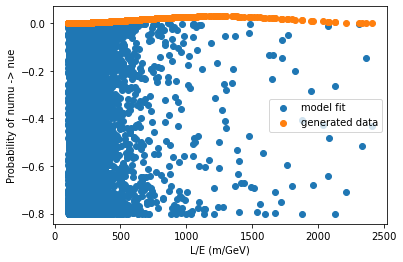

In [7]:
plt.scatter(L_over_E, best_fit['prediction'] , label='model fit')
plt.scatter(L_over_E, data['N_nue'] , label='generated data')

plt.xlabel('L/E (m/GeV)')
plt.ylabel('Probability of numu -> nue')
plt.legend()

(-0.1, 0.1)

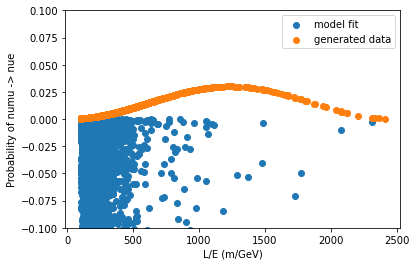

In [13]:
plt.scatter(L_over_E, best_fit['prediction'] , label='model fit')
plt.scatter(L_over_E, data['N_nue'] , label='generated data')

plt.xlabel('L/E (m/GeV)')
plt.ylabel('Probability of numu -> nue')
plt.legend()
ax =  plt.gca()
ax.set_ylim(-0.1, 0.1)